In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from testCases import *
from planar_utils import *

In [2]:
np.random.seed(1) #set a seed so that the results are consistent
X,Y=load_planar_dataset()
plt.scatter(X[0,:],X[1,:],c=Y,s=40,cmap=plt.cm.Spectral) # 可视化数据
shape_X=X.shape
shape_Y=Y.shape
m=X.shape[1]
print("The shape of X is:"+str(shape_X))
print("The shape of Y is:"+str(shape_Y))
print("I have %d training example"%(m))


ValueError: c of shape (1, 400) not acceptable as a color sequence for x with size 400, y with size 400

In [3]:
# Train the logistic regression classifier
clf=sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T,Y.T)
plot_decision_boundary(lambda x:clf.predict(x),X,Y)
plt.title("Logistic Regression")
LR_predictions=clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: c of shape (1, 400) not acceptable as a color sequence for x with size 400, y with size 400

In [4]:
#确定各层神经元的个数
def layer_sizes(X,Y):
    n_x=X.shape[0]
    n_h=4
    n_y=Y.shape[0]
    return n_x,n_h,n_y

In [5]:
def initialize_parameters(n_x,n_h,n_y):
    w1=np.random.randn(n_h,n_x)*0.01
    b1=np.zeros((n_h,1))
    w2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros((n_y,1))
    assert(w1.shape==(n_h,n_x))
    assert(b1.shape==(n_h,1))
    assert(w2.shape==(n_y,n_h))
    assert(b2.shape==(n_y,1))
    parameters={"w1":w1,
                "b1":b1,
                "w2":w2,
                "b2":b2
        
    }
    return parameters

In [6]:
def forward_propagation(X,parameters):
    w1=parameters["w1"]
    b1=parameters["b1"]
    w2=parameters["w2"]
    b2=parameters["b2"]
    Z1=np.dot(w1,X)+b1
    A1=np.tanh(Z1)
    Z2=np.dot(w2,A1)+b2
    A2=sigmoid(Z2)
    assert(A2.shape==(1,X.shape[1]))
    cache={"Z1":Z1,
           "A1":A1,
           "Z2":Z2,
           "A2":A2
        
    }
    return A2,cache
    
    

In [7]:
def compute_cost(Y,parameters,A2):
    m=Y.shape[1]
    cost=-1/m*np.sum(np.multiply(Y,np.log(A2))+np.multiply((1-Y),np.log(1-A2)))
    cost=np.squeeze(cost)
    assert(isinstance(cost,float))
    return cost

In [8]:
def backward_propagation(parameters,cache,X,Y):
    m=X.shape[1]
    w1=parameters["w1"]
    w2=parameters["w2"]
    
    A1=cache["A1"]
    A2=cache["A2"]
    
    dZ2=A2-Y
    dw2=1/m*np.dot(dZ2,A1.T)
    db2=1/m*np.sum(dZ2,axis=1,keepdims=True)
    dZ1=np.dot(w2.T,dZ2)*(1-np.power(A1,2))
    dw1=1/m*np.dot(dZ1,X.T)
    db1=1/m*np.sum(dZ1,axis=1,keepdims=True)
    
    grads={"dw1":dw1,
           "db1":db1,
           "dw2":dw2,
           "db2":db2
        
    }
    return grads
    
    

In [9]:
def updata_parameters(grads,parameters,learning_rate=1.2):
    w1=parameters["w1"]
    b1=parameters["b1"]
    w2=parameters["w2"]
    b2=parameters["b2"]
    dw1=grads["dw1"]
    db1=grads["db1"]
    dw2=grads["dw2"]
    db2=grads["db2"]
    
    w1-=learning_rate*dw1
    b1-=learning_rate*db1
    w2-=learning_rate*dw2
    b2=-learning_rate*db2
    
    parameters={"w1":w1,
               "b1":b1,
               "w2":w2,
               "b2":b2}
    return parameters

In [10]:
def nn_model(X,Y,n_h,num_iterations=10000,print_cost=False):
    np.random.seed(3)
    n_x=layer_sizes(X,Y)[0]
    n_y=layer_sizes(X,Y)[2]
    parameters=initialize_parameters(n_x,n_h,n_y)
    w1=parameters["w1"]
    b1=parameters["b1"]
    w2=parameters["w2"]
    b2=parameters["b2"]
    for i in range(0,num_iterations):
        A2,cache=forward_propagation(X,parameters)
        cost=compute_cost(Y,parameters,A2)
        grads=backward_propagation(parameters,cache,X,Y)
        parameters=updata_parameters(grads,parameters,learning_rate=1.2)
        if print_cost and i%1000==0:
            print("Cost after iterations %d :%f"%(i,cost))
    return parameters
            

In [11]:
def predict(parameters,X):
    A2,cache=forward_propagation(X,parameters)
    prediction=np.around(A2)  # 四舍五入，取0-1预测值
    return prediction
    

In [12]:
# 构建一个n_h=4（隐层神经元个数）的浅层神经网络
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')
plt.show()

Cost after iterations 0 :0.693162
Cost after iterations 1000 :0.258039
Cost after iterations 2000 :0.239136
Cost after iterations 3000 :0.230739
Cost after iterations 4000 :0.225526
Cost after iterations 5000 :0.221875
Cost after iterations 6000 :0.219146
Cost after iterations 7000 :0.220905
Cost after iterations 8000 :0.219675
Cost after iterations 9000 :0.218783


ValueError: c of shape (1, 400) not acceptable as a color sequence for x with size 400, y with size 400

accuracy for 1 hidden units:67.5%


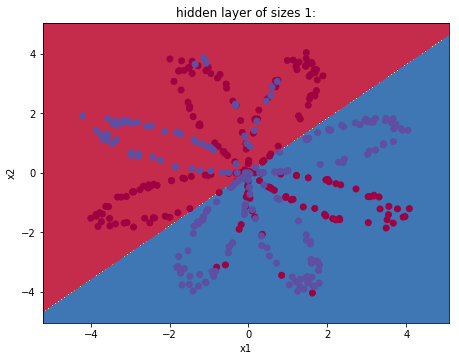

accuracy for 2 hidden units:67.5%


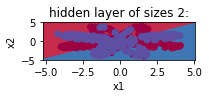

accuracy for 3 hidden units:90.75%


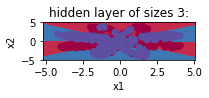

accuracy for 4 hidden units:90.5%


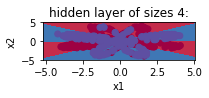

accuracy for 5 hidden units:91.0%


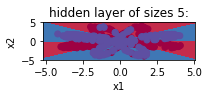

accuracy for 10 hidden units:90.5%


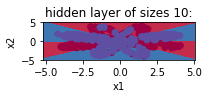

accuracy for 20 hidden units:90.5%


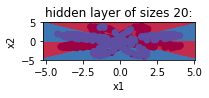

In [26]:
plt.figure(figsize=(16,32))
hidden_layer_sizes=[1,2,3,4,5,10,20]
for i,n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5,2,i+1)
    plt.title("hidden layer of sizes %d:"%(n_h))
    parameters=nn_model(X,Y,n_h,num_iterations=5000)
    predictions=predict(parameters,X)
    plot_decision_boundary(lambda x:predict(parameters,x.T),X,Y)
    accuracy=float((np.dot(Y,predictions.T)+np.dot((1-Y),(1-predictions.T)))/float(Y.size)*100)
    print("accuracy for {} hidden units:{}%".format(n_h,accuracy))
    plt.show()